<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sat Jul 15 11:18:01 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.40                 Driver Version: 536.40       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3080 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   55C    P0              29W /  94W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

1.13.0+cu117


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

The main idea of preventing underfitting is to: increase our model's predictive power.

* Add more layers/units to your model (increase model complexity). This will potentially give the model more of an opportunity to learn generalizable patterns in the training data. For example, instead of using 2 hidden layers, use 4 hidden layers instead.

* Use transfer learning. Transfer leanring helps to prevent underfitting by leveraging already existing/working patterns from one model/dataset and using them with your own problem.

* Train the model for longer. Perhaps your initial training schedule didn't give your model enough opportunity to learn patterns in the data. Training your model for longer (more epochs) may give improved results.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [3]:
import requests
import zipfile
from pathlib import Path


# 1. Get data
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

# Create dataset path if it isn't exist
if image_path.is_dir():
    print(f'Path of dataset is exist.')
else:
    image_path.mkdir(parents=True,
                     exist_ok=True)
    
    # Download dataset if it isn't exist
    with open(data_path / 'pizza_steak_sushi', 'wb') as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print(f'Download dataset...')
        f.write(request.content)

    # Unzip data from zip file
    with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip', 'r') as zip_f:
        print(f'Unzipping...')
        zip_f.extractall(path=image_path)

Path of dataset is exist.


In [4]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
# Setup train and testing paths
walk_through_dir(dir_path=image_path)
train_dir = image_path / 'train'
test_dir = image_path / 'test'

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg')]
data\pizza_steak_sushi\train\sushi\542188.jpg
Random image path: data\pizza_steak_sushi\train\sushi\542188.jpg
Image class: sushi
Image height: 512
Image width: 512


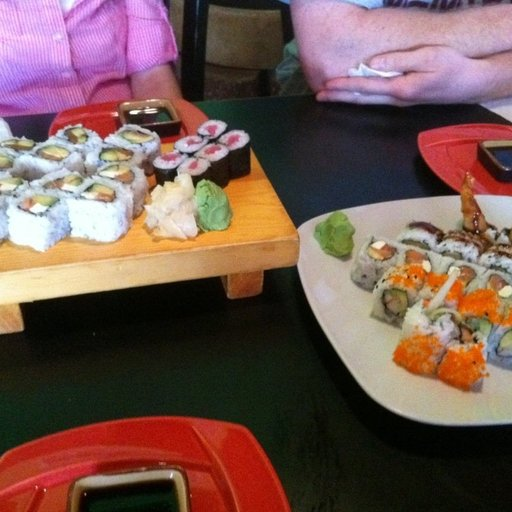

In [6]:
# Visualize an image
import random
from PIL import Image

# Get all images
image_path_list = list(image_path.glob('*/*/*.jpg'))
print(image_path_list[:3])

# Get random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# Get the class of random image
image_class = random_image_path.parent.stem

# Open image
img = Image.open(random_image_path)

# Print data
print(f'Random image path: {random_image_path}')
print(f'Image class: {image_class}')
print(f'Image height: {img.height}')
print(f'Image width: {img.width}')
img

(-0.5, 511.5, 511.5, -0.5)

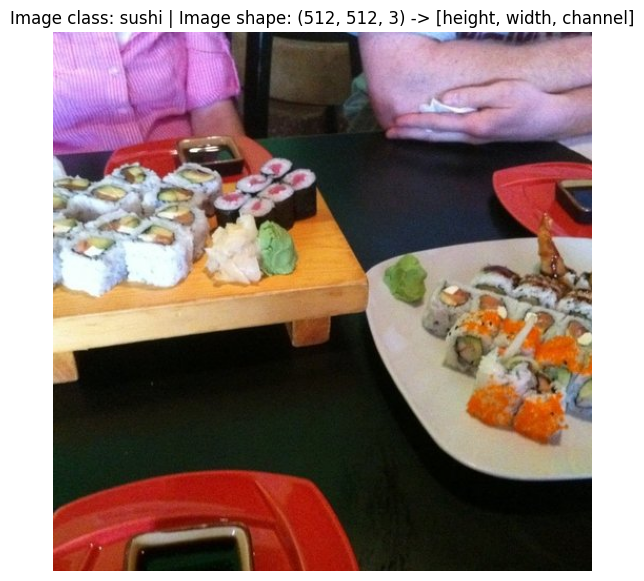

In [7]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.array(img)

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f'Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, channel]')
plt.axis('off')

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [8]:
# 3.1 Transforming data with torchvision.transforms
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [9]:
# Write transform for turning images into tensors
transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=.5),
    transforms.ToTensor()
])

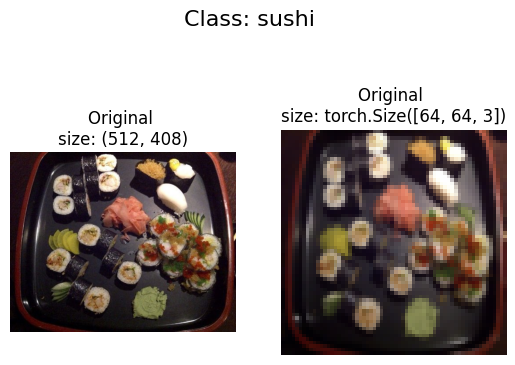

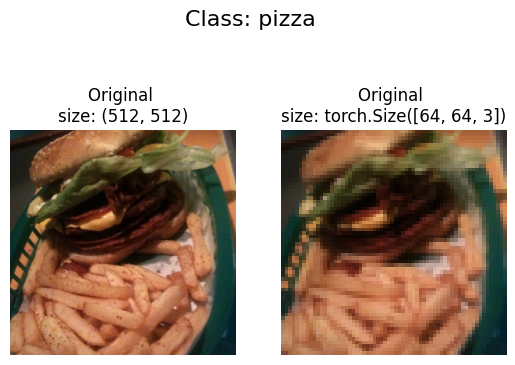

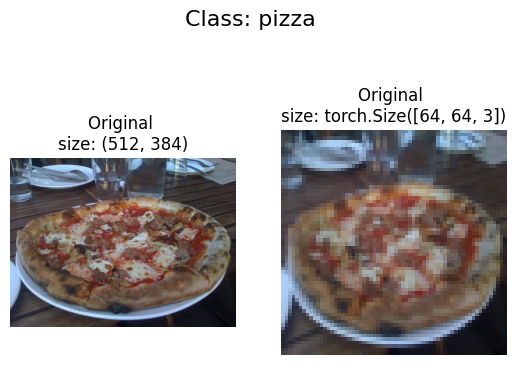

In [10]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths: list,
                            transform: transforms,
                            n: int=3,
                            seed: int=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)

    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f'Original \nsize: {f.size}')
            ax[0].axis('off')

            # Plot transformed image
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Original \nsize: {transformed_image.shape}')
            ax[1].axis('off')

            fig.suptitle(f'Class: {image_path.parent.stem}', fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=transform)

### Load image data using `ImageFolder`

In [11]:
# Use ImageFolder to create dataset(s)
from torchvision.datasets import ImageFolder


train_data = ImageFolder(root=train_dir,
                         transform=transform,
                         target_transform=None)

test_data = ImageFolder(root=test_dir,
                        transform=transform,
                        target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [12]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [13]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [14]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [15]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader


# Batch size
BATCH_SIZE = 1

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2964ed7c6a0>,
 <torch.utils.data.dataloader.DataLoader at 0x2964b6b1f30>)

In [16]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(225, 75)

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [17]:
from torch import nn


class TinyVGG(nn.Module):
    def __init__(self, 
                 input_shape,
                 hidden_units,
                 output_shape) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [18]:
from torchinfo import summary


model_0 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(class_names)).to(device)

summary(model=model_0)

Layer (type:depth-idx)                   Param #
TinyVGG                                  --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       560
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       3,620
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       3,620
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       3,620
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
├─Sequential: 1-3                        --
│    └─Flatten: 2-11                     --
│    └─Linear: 2-12                      15,363
Total params: 26,783
Trainable params: 26,783
Non-trainable params: 0

## 4. Create training and testing functions for `model_0`.

In [19]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = map(lambda x: x.to(device), [X, y])
    # 1. Forward pass
    y_pred = model(X)
    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad 
    optimizer.zero_grad()

    # 4. Loss backward 
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.softmax(y_pred, dim=1).argmax(dim=1)
    train_acc += ((y_pred_class == y).sum().item() / len(y_pred))
    

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc

In [20]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  
  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = map(lambda x: x.to(device), [X, y])

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      test_pred_label = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_label == y).sum().item() / len(test_pred_label))

    
  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [21]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  
  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model, 
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model, 
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    
    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 

In [22]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), 
                             lr=0.001)

model_0_result = train(model=model_0,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5)

model_0_result

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1175 | train_acc: 0.2978 | test_loss: 1.0963 | test_acc: 0.3200
Epoch: 2 | train_loss: 1.1002 | train_acc: 0.3111 | test_loss: 1.0996 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0993 | train_acc: 0.2889 | test_loss: 1.1001 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0991 | train_acc: 0.3244 | test_loss: 1.1001 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.1102 | train_acc: 0.3689 | test_loss: 1.0909 | test_acc: 0.4133


{'train_loss': [1.1175339579582215,
  1.1001998233795165,
  1.0993439520729913,
  1.0991216225094265,
  1.1101987020836936],
 'train_acc': [0.29777777777777775,
  0.3111111111111111,
  0.28888888888888886,
  0.3244444444444444,
  0.3688888888888889],
 'test_loss': [1.0962785466512044,
  1.099563045501709,
  1.1001379982630413,
  1.100147557258606,
  1.0909429629643759],
 'test_acc': [0.32,
  0.25333333333333335,
  0.3333333333333333,
  0.3333333333333333,
  0.41333333333333333]}

In [23]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), 
                             lr=0.001)

model_1_result = train(model=model_1,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=20)

model_1_result

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1177 | train_acc: 0.2978 | test_loss: 1.0962 | test_acc: 0.3733
Epoch: 2 | train_loss: 1.1003 | train_acc: 0.3111 | test_loss: 1.0996 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0994 | train_acc: 0.2933 | test_loss: 1.1002 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0991 | train_acc: 0.3244 | test_loss: 1.1001 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0993 | train_acc: 0.3333 | test_loss: 1.1004 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0990 | train_acc: 0.3467 | test_loss: 1.1007 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0992 | train_acc: 0.3644 | test_loss: 1.1035 | test_acc: 0.2533
Epoch: 8 | train_loss: 1.0993 | train_acc: 0.3333 | test_loss: 1.1005 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1008 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1013 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1015 | test_acc: 0.3333
Epoch: 12 | train_l

{'train_loss': [1.1176644672287834,
  1.1002556875016953,
  1.099360080824958,
  1.0990908575057983,
  1.0993003500832452,
  1.0990091281467014,
  1.0992358181211683,
  1.0992922247780694,
  1.0986757220162287,
  1.098597306145562,
  1.0986640463935005,
  1.0986776420805189,
  1.098733565542433,
  1.0987186564339533,
  1.0987242693371242,
  1.0985542090733846,
  1.0988474395540027,
  1.098716493712531,
  1.0986884127722847,
  1.0988163873884413],
 'train_acc': [0.29777777777777775,
  0.3111111111111111,
  0.29333333333333333,
  0.3244444444444444,
  0.3333333333333333,
  0.3466666666666667,
  0.36444444444444446,
  0.3333333333333333,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667],
 'test_loss': [1.0961921151479086,
  1.099553459485372,
  1.1001606114705405,
  1.1001122093

In [24]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(), 
                             lr=0.001)

model_2_result = train(model=model_2,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=50)

model_2_result

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1176 | train_acc: 0.2978 | test_loss: 1.0962 | test_acc: 0.3200
Epoch: 2 | train_loss: 1.1002 | train_acc: 0.3111 | test_loss: 1.0995 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0994 | train_acc: 0.2622 | test_loss: 1.1001 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0991 | train_acc: 0.3244 | test_loss: 1.1002 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0992 | train_acc: 0.3289 | test_loss: 1.1004 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0990 | train_acc: 0.3467 | test_loss: 1.1007 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0993 | train_acc: 0.3467 | test_loss: 1.1008 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0990 | train_acc: 0.3467 | test_loss: 1.1010 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1011 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1018 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1019 | test_acc: 0.3333
Epoch: 12 | train_l

{'train_loss': [1.1176493008931478,
  1.100221808221605,
  1.0993984333674114,
  1.0991295666164822,
  1.099215218226115,
  1.0990037186940511,
  1.099263259039985,
  1.099027354982164,
  1.098721514807807,
  1.0987407361136543,
  1.0985979085498385,
  1.099569395383199,
  1.0992946868472628,
  1.0987399678760106,
  1.0986927064259846,
  1.0985461727778116,
  1.0988368384043377,
  1.0986901368035211,
  1.098694288995531,
  1.0987990342246161,
  1.0987271383073596,
  1.0985966703626844,
  1.0989461697472467,
  1.0986398225360448,
  1.0987097194459703,
  1.0988053682115342,
  1.0987604755825466,
  1.0986541684468587,
  1.0988709831237793,
  1.0989721229341296,
  1.0985640954971314,
  1.0988162978490195,
  1.0985282797283595,
  1.0986289114422267,
  1.0986175791422526,
  1.0987078179253473,
  1.0987746816211277,
  1.0987816180123222,
  1.0988481918970743,
  1.0987278111775716,
  1.098806749449836,
  1.0987384928597344,
  1.0986934598286946,
  1.0989811605877347,
  1.0985880099402534,
  1.

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [25]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_3 = TinyVGG(input_shape=3,
                  hidden_units=20, # use 20 hidden units instead of 10
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)

model_3_results = train(model=model_3,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=20) # train for 20 epochs

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0977 | train_acc: 0.3689 | test_loss: 1.0908 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0991 | train_acc: 0.3467 | test_loss: 1.0809 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.0667 | train_acc: 0.4533 | test_loss: 1.0682 | test_acc: 0.4800
Epoch: 4 | train_loss: 1.0344 | train_acc: 0.5333 | test_loss: 1.0236 | test_acc: 0.5067
Epoch: 5 | train_loss: 0.9515 | train_acc: 0.5511 | test_loss: 1.0272 | test_acc: 0.4800
Epoch: 6 | train_loss: 0.8992 | train_acc: 0.5644 | test_loss: 1.0399 | test_acc: 0.4533
Epoch: 7 | train_loss: 0.9051 | train_acc: 0.6000 | test_loss: 1.0062 | test_acc: 0.4267
Epoch: 8 | train_loss: 0.8234 | train_acc: 0.6667 | test_loss: 0.9571 | test_acc: 0.5067
Epoch: 9 | train_loss: 0.7841 | train_acc: 0.6311 | test_loss: 1.0680 | test_acc: 0.5067
Epoch: 10 | train_loss: 0.7263 | train_acc: 0.7067 | test_loss: 1.0268 | test_acc: 0.4400
Epoch: 11 | train_loss: 0.7383 | train_acc: 0.7022 | test_loss: 1.0117 | test_acc: 0.4400
Epoch: 12 | train_l

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [26]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...") 
    zip_ref.extractall(image_path)

data\pizza_steak_sushi_20_percent directory exists.
Unzipping pizza, steak, sushi 20% data...


In [27]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\test'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\pizza'.
There are 0 directories and 58 images in 'data\pizza_steak_sushi_20_percent\test\steak'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\train'.
There are 0 directories and 154 images in 'data\pizza_steak_sushi_20_percent\train\pizza'.
There are 0 directories and 146 images in 'data\pizza_steak_sushi_20_percent\train\steak'.
There are 0 directories and 150 images in 'data\pizza_steak_sushi_20_percent\train\sushi'.


Excellent, we now have double the training and testing images... 

In [28]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(WindowsPath('data/pizza_steak_sushi_20_percent/train'),
 WindowsPath('data/pizza_steak_sushi_20_percent/test'))

In [36]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),                                     
  transforms.ToTensor()
])

# Create datasets
train_data_20_percent = ImageFolder(train_data_20_percent_path,
                                    transform=simple_transform)

test_data_20_percent = ImageFolder(test_data_20_percent_path,
                                   transform=simple_transform)

# Create dataloaders
train_dataloader_20_percent = DataLoader(train_data_20_percent, 
                                         batch_size=32,
                                         shuffle=True)

test_dataloader_20_percent = DataLoader(test_data_20_percent,
                                        batch_size=32,
                                        shuffle=False)

In [37]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [38]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_4 = TinyVGG(input_shape=3,
                  hidden_units=20, # use 20 hidden units instead of 10
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_4.parameters(), lr=0.001)

model_4_results = train(model=model_4,
                        train_dataloader=train_dataloader_20_percent, # use double the training data
                        test_dataloader=test_dataloader_20_percent, # use double the testing data
                        optimizer=optimizer,
                        epochs=20) # train for 20 epochs

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1045 | train_acc: 0.3333 | test_loss: 1.1020 | test_acc: 0.2875
Epoch: 2 | train_loss: 1.0980 | train_acc: 0.3396 | test_loss: 1.0914 | test_acc: 0.4983
Epoch: 3 | train_loss: 1.0795 | train_acc: 0.4437 | test_loss: 1.0330 | test_acc: 0.4534
Epoch: 4 | train_loss: 0.9525 | train_acc: 0.5563 | test_loss: 0.9574 | test_acc: 0.4994
Epoch: 5 | train_loss: 0.8906 | train_acc: 0.6042 | test_loss: 0.9603 | test_acc: 0.4892
Epoch: 6 | train_loss: 0.8356 | train_acc: 0.6354 | test_loss: 1.0479 | test_acc: 0.4688
Epoch: 7 | train_loss: 0.9141 | train_acc: 0.5521 | test_loss: 0.9116 | test_acc: 0.5898
Epoch: 8 | train_loss: 0.7977 | train_acc: 0.6375 | test_loss: 0.8993 | test_acc: 0.5949
Epoch: 9 | train_loss: 0.7966 | train_acc: 0.6312 | test_loss: 0.9040 | test_acc: 0.5273
Epoch: 10 | train_loss: 0.7928 | train_acc: 0.6625 | test_loss: 0.8782 | test_acc: 0.6131
Epoch: 11 | train_loss: 0.7417 | train_acc: 0.6813 | test_loss: 0.8890 | test_acc: 0.5818
Epoch: 12 | train_l

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction. 
* Does the model you trained in exercise 7 get it right? 
* If not, what do you think you could do to improve it?

In [32]:
# Get a custom image
custom_image = "pizza_dad.jpeg"
with open("pizza_dad.jpeg", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
  f.write(request.content)

In [33]:
# Load the image
import torchvision
img = torchvision.io.read_image(custom_image)
img

tensor([[[154, 175, 181,  ...,  21,  18,  14],
         [146, 167, 180,  ...,  21,  18,  15],
         [124, 146, 171,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 189, 193,  ...,  22,  19,  15],
         [163, 181, 194,  ...,  22,  19,  16],
         [141, 163, 185,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 106, 104, 102],
         [ 47,  38,  24,  ..., 108, 105, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[117, 138, 145,  ...,  17,  14,  10],
         [109, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  54,  52,  50],
         [ 27,  18,   4,  ...,  50,  47,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

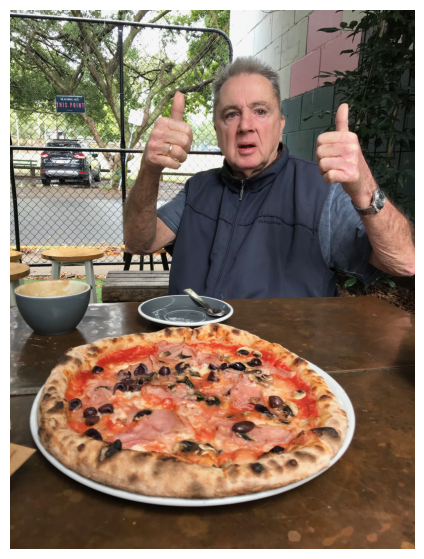

In [34]:
# View the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0)) # matplotlib likes images in HWC (height, width, color_channels) format not CHW (color_channels, height, width)
plt.axis(False);
     

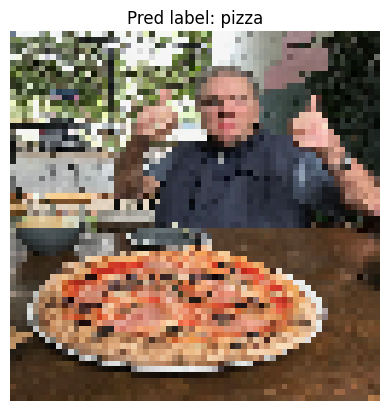

In [35]:
# Make a prediction on the image
model_4.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.

  # Resize image to 64x64
  resize = transforms.Resize((64, 64))
  img = resize(img)

  # Turn image in single batch and pass to target device
  batch = img.unsqueeze(0).to(device)

  # Predict on image
  y_pred_logit = model_4(batch) 

  # Convert pred logit to pred label
  # pred_label = torch.argmax(torch.softmax(y_pred_logit, dim=1), dim=1)
  pred_label = torch.argmax(y_pred_logit, dim=1) # get same results as above without torch.softmax

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False);